# Leads Conversion Using Logistic Regression

# About the Dataset.
    1. Prospect ID: A unique ID with which the customer is identified.
    2. Lead Number:	A lead number assigned to each lead procured.
    3. Lead Origin:	The origin identifier with which the customer was identified to be a lead. Includes API, 44 Landing Page Submission, etc.

    4. Lead Source:	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
    5.  Do Not Email:	An indicator variable selected by the customer wherein they select whether of not they      want to be emailed about the course or not.
    6.Do Not Call:	An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
    7.Converted:	The target variable. Indicates whether a lead has been successfully converted or not.
    8.TotalVisits:	The total number of visits made by the customer on the website.
    9.Total Time Spent on Website:	The total time spent by the customer on the website.
    10.Page Views Per Visit: 	Average number of pages on the website viewed during the visits.
    11.Last Activity:	Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
    12.Country:	The country of the customer.
    13.Specialization	The industry domain in which the customer worked before. Includes the level 'Select     Specialization' which means the customer had not selected this option while filling the form.
    14.How did you hear about X Education:	The source from which the customer heard about X Education.
    15.What is your current occupation:	Indicates whether the customer is a student, umemployed or employed.
    16.What matters most to you in choosing this course	An option selected by the customer indicating what is their main motto behind doing this course.
    17.Search	Indicating whether the customer had seen the ad in any of the listed items.
    Magazine	    
    Newspaper Article,X Education Forums,Newspaper,Digital Advertisement	
    18.Through Recommendations	Indicates whether the customer came in through recommendations.
    Receive More Updates About Our Courses	Indicates whether the customer chose to receive more updates about the courses.
    19.Tags:   	Tags assigned to customers indicating the current status of the lead.
    20.Lead Quality:	Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
    21.Update me on Supply Chain Content:	Indicates whether the customer wants updates on the Supply Chain Content.
    22.Get updates on DM Content:	Indicates whether the customer wants updates on the DM Content.
    23.Lead Profile:	A lead level assigned to each customer based on their profile.
    24.City:	The city of the customer.
    25.Asymmetrique Activity Index:	An index and score assigned to each customer based on their activity and their profile
    26.Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score	
    I agree to pay the amount through cheque	Indicates whether the customer has agreed to pay the amount through cheque or not.
    a free copy of Mastering The Interview	Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
    Last Notable Activity	The last notable acitivity performed by the student.


In [126]:
#Installing Package
!pip install plotly

# Steps to Perform.
0. Import Packages.
1. Reading Dataset.
2. Basic Information.
3. Handling Missing Values
4. EDA : Exploratory Data Analysis
5. Outlier Detection and Capping.
6. Features Selection Based on correlation and Select K method.
7. Model Selection and Training. 



## Step 1: Import Packages


In [127]:
## Step 0: Import packages
### Step 0.1 Plackages for basic data manuplation.
import pandas as pd ## Pandas packages for data manuplation and using DataFrames.
import numpy as np ## For some mathmetical or matrics manuplation.

### Step 0.2: Ploting Libraries
import matplotlib.pyplot as plt ## For EDA or ploting Graphs
import seaborn as sns ## For EDA or ploting advance graphs.
import plotly.express as px ## For EDA or advance plots.

## Step 0.3 Packages for feature engineering and Modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split, cross_val_score

## Step 1. Reading Dataset

In [128]:
## Step 1. Reading Datasets in dataframe
PATH  = "./Leads.csv"
df = pd.read_csv(PATH)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Observations
1. As we can see that is a defines as a uniquely identfier of each row. We will drop this as it will not be much usefull for getting inferences and train better quality ML model. 

## Step 2. Basic Data Manuplation.

In [129]:
## Step 2.1 Shape of dataset.
num_rows = f"No. of rows: {df.shape[0]}"
num_cols = f"No. of cols: {df.shape[1]}"
dimentation = f"{num_rows} x {num_cols}"
print("<-----------------------Shape of dataset--------------------------->")
print(dimentation)

<-----------------------Shape of dataset--------------------------->
No. of rows: 9240 x No. of cols: 37


In [130]:
## Step 2.2 Data type info about the datasets.
df.info()   ## This method prints the dtypes info and the no of cols and row in datasets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Observations
1. Here 30 columns are Object these are the majority column data types. Also 4 float64 and 3 int64 columns are also there.
2. Also Our Target Column "Converted" is a int64 dtype. 

In [131]:
## Step 2.3 Num of null values in each col.
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Observations
1. Here some columns has more then half entries as Null or None, in the cleaning process we will discard all of these columns.
2. We will include all of these columns that has null value percentage less then 5%.
3. Also in the problem statement some of the columns has categorical value name "Select", This value is here because the form that users filed has select with not required so, where users did not feel any data point that data point will marks "Select"
4. First we will count this value in all categorical columns and select the columns based on decided ratio.

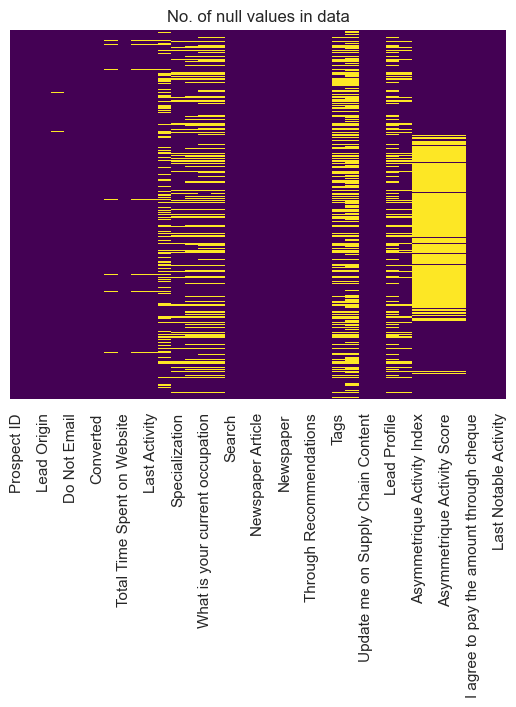

In [132]:
# Step : 2.4 Ploting heat map for null values for application data.
sns.heatmap(df.isnull(),yticklabels = False, cbar= False, cmap = "viridis").set_title("No. of null values in data");

## Observations
1. Here Yellow lines show the missing values higher the yello lines, higher the missing values. 

In [133]:
#Step 2.5 Checking for Nan values percentage on application dataset
def check_percentage(df, cols  =  None, thresh =  0):
    """
    returns the missing val column list and print the percentage missing values in each column.
    Args:
        df(pandas.dataframe): Pandas dataframe. 
    Returns:
        missing_val_col(List): List of columns names that has missing values.
    """
    missing_val_col,count,sum_null = [],0,df.isna().sum()
    if(cols == None):
        cols = df.columns
    for col in cols:
        pct = df[col].isna().mean() * 100
        if(sum_null[col]!=0 and pct > thresh):
            count+=1
            missing_val_col.append(col)
            print(f"{col} : {sum_null[col]} => {round(pct, 2)}%")
    print()
    print("No. Of Columns: ", count)
    return missing_val_col

# function calling    
drop_columns = check_percentage(df,thresh=5)

Country : 2461 => 26.63%
Specialization : 1438 => 15.56%
How did you hear about X Education : 2207 => 23.89%
What is your current occupation : 2690 => 29.11%
What matters most to you in choosing a course : 2709 => 29.32%
Tags : 3353 => 36.29%
Lead Quality : 4767 => 51.59%
Lead Profile : 2709 => 29.32%
City : 1420 => 15.37%
Asymmetrique Activity Index : 4218 => 45.65%
Asymmetrique Profile Index : 4218 => 45.65%
Asymmetrique Activity Score : 4218 => 45.65%
Asymmetrique Profile Score : 4218 => 45.65%

No. Of Columns:  13


## Observations
1. Here 13 columns has higher missing value from thresh hold of 5. Need to drop these columns.
2. Also we will drop the  Prospect ID column as we discussed that is no use in further analysis

## Step 3 Handling Missing Values

### Step 3.1 Droping Missing Values

In [134]:
# Step 3.1.1 Dropping those columns that has more then 5% missing values.
drop_columns.append("Prospect ID")  ## Including the prospect id.
df.drop(drop_columns, axis=1, inplace= True)

#Step: 3.1.2 Shape of Data Frame.
## Step 2.1 Shape of dataset.
num_rows = f"No. of rows: {df.shape[0]}"
num_cols = f"No. of cols: {df.shape[1]}"
dimentation = f"{num_rows} x {num_cols}"
print("<-----------------------Shape of dataset After Droping Null Values columns--------------------------->")
print(dimentation)

<-----------------------Shape of dataset After Droping Null Values columns--------------------------->
No. of rows: 9240 x No. of cols: 23


In [135]:
# Step 3.2.1 replacing nan values to a cat features nan values.
cat_feature_nan = [col for col in df.columns if df[col].dtype == 'O']
cat_feature_nan
def replacing_nan_val(dataset, feature_nan):
    data= dataset.copy()
    data[feature_nan] = data[feature_nan].fillna("Empty")
    return data


## Calling the features.
missing_value = check_percentage(df,cat_feature_nan)
df = replacing_nan_val(df,missing_value)

Lead Source : 36 => 0.39%
Last Activity : 103 => 1.11%

No. Of Columns:  2


## Observations
1. Here only two categorical columns that has missing values. 
2. We replaced Missing values to a new category Empty.

In [136]:
# Step 3.2.2 Replaceing nan values to numerical values.
numerical_features_nan = [col for col in df.columns if df[col].dtype != 'O']

def replace_value(dataset, feature_nan):
    data= dataset.copy()
    data[feature_nan] = data[feature_nan].fillna(data[feature_nan].mean())
    return data

# Calling function.
numerical_value_nan = check_percentage(df, numerical_features_nan)
df =  replace_value(df,numerical_value_nan)

TotalVisits : 137 => 1.48%
Page Views Per Visit : 137 => 1.48%

No. Of Columns:  2


## Observations
1. Here two columns has missing values so we replaced with mode value of each columns.

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9240 non-null   object 
 3   Do Not Email                              9240 non-null   object 
 4   Do Not Call                               9240 non-null   object 
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9240 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9240 non-null   float64
 9   Last Activity                             9240 non-null   object 
 10  Search                              

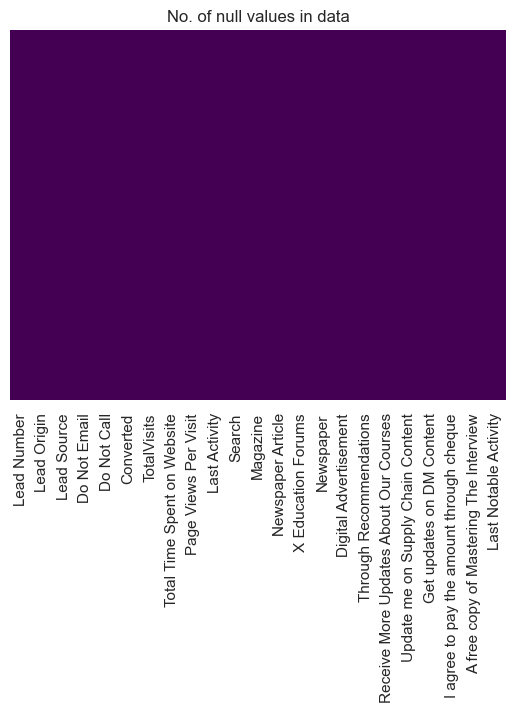

In [138]:
# Step 3.3 Checking the null values.
sns.heatmap(df.isnull(),yticklabels = False, cbar= False, cmap = "viridis").set_title("No. of null values in data");

## Inference:
1. All the null null imputed. for categorical col we replace the values with new category and for numerical col we replaced with mean value.

## Step 4. EDA: Exploratry Data Analysis

In [139]:
## Step 4.1 Basic Descerete Statistic Analysis on Application dataset.
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.818723,548.021466,2.145333
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


## Observations
1. Here 5 columns are Numerical columns. 
2. Out of 5 four columns has minimum value zero.
3. Converted column that is our target column  has 50% Zero values that means there much more percentage of people that not converted. 

In [140]:
## Our Target column is Converted
TARGET_COLUMN = "Converted"


## Extracting the categorical columns.
CAT_COLS = [col for col in df if df[col].dtype =='O']

## Extracting the numerical columns.
NUM_COLS  = [col for col in df if df[col].dtype != 'O']

## No. of categorical columns and numerical columns.
print(f"No. of categorical columns : {len(CAT_COLS)}")
print(f"No. of numerical columns   : {len(NUM_COLS)}")

No. of categorical columns : 18
No. of numerical columns   : 5


In [141]:
## Step 4.2 Plotting the target column distribution.
def plot_target_distribution(dataframe, target_col_name):
    """
    Plot a count plot of the distribution of the target column.

    Parameters:
        dataframe (pandas.DataFrame): DataFrame containing the data.
        target_col_name (str): Name of the target column in the DataFrame.

    Returns:
        None
    """
    target_col = dataframe[target_col_name]
    fig = px.histogram(target_col,
                       labels={'value': target_col_name},
                       title=f"Distribution of {target_col_name}",
                       marginal='violin',
                       color_discrete_sequence=['green'])
    fig.update_layout(
        xaxis_title_text=f'{target_col_name}',
        yaxis_title_text='Count',
        bargap=0.2,
        showlegend=False
    )
    fig.show()

## Ploting count plot of target variable to see the distribution of two target category
plot_target_distribution(df,TARGET_COLUMN)

## Observation
1. As we earlier predicted that Target column has higher number of 0 values then 1. We have more negative examples in our training then positive. 

In [142]:
## Step 4.3 Bivariate Analysis with Categorical columns.
# Step 4.3.1 No. of classes in categorical columns.
df[CAT_COLS].nunique()

Lead Origin                                  5
Lead Source                                 22
Do Not Email                                 2
Do Not Call                                  2
Last Activity                               18
Search                                       2
Magazine                                     1
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Receive More Updates About Our Courses       1
Update me on Supply Chain Content            1
Get updates on DM Content                    1
I agree to pay the amount through cheque     1
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

## Observations
1. Here most of the categorical columns has 2 categories.
2. Lead Source that seems to be an sources from where we get the leads of customers is 21 that is highest categories among all the columns.

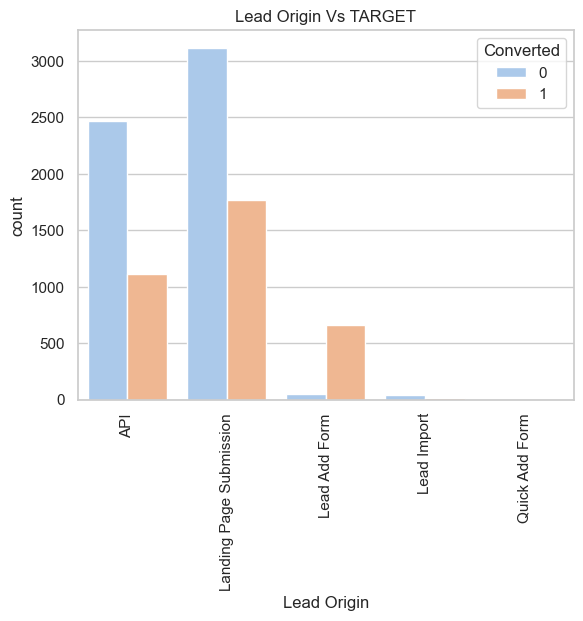

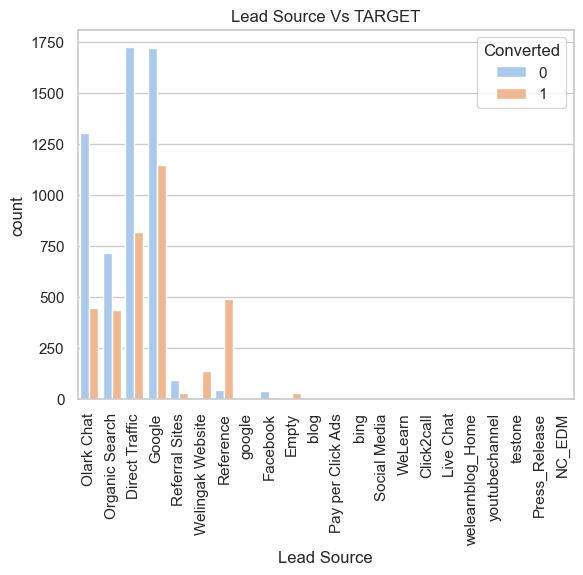

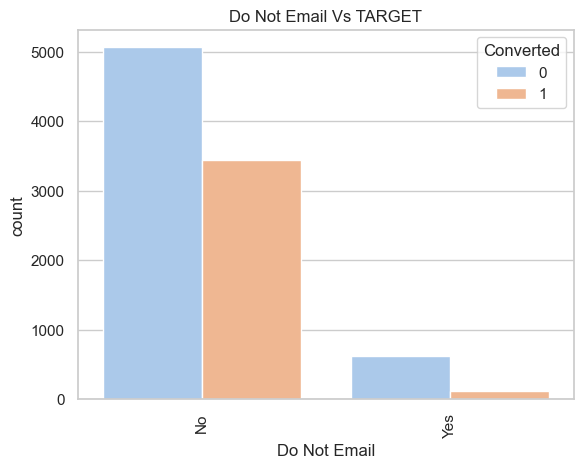

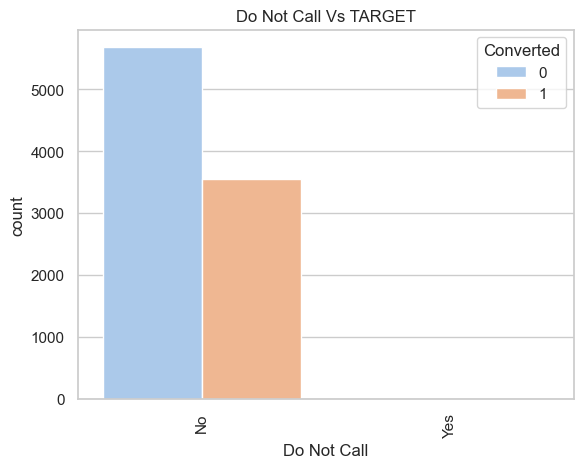

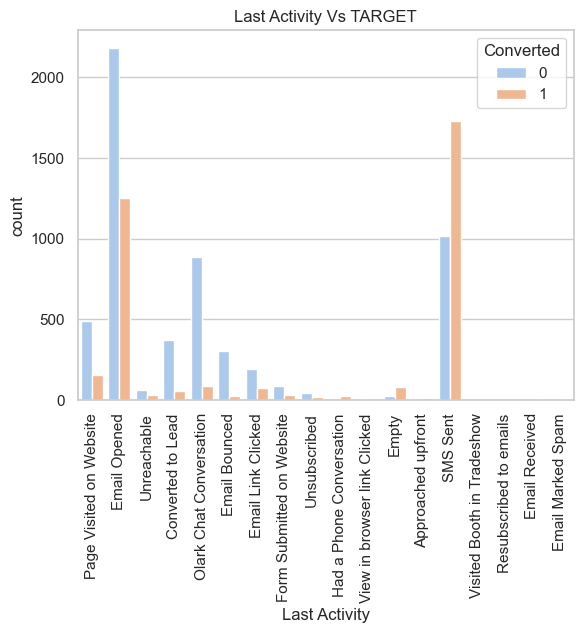

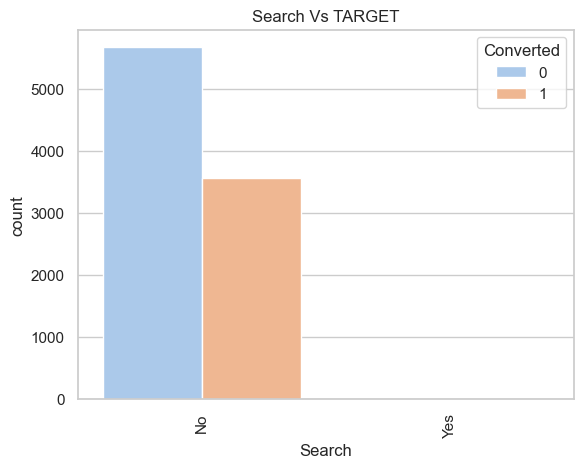

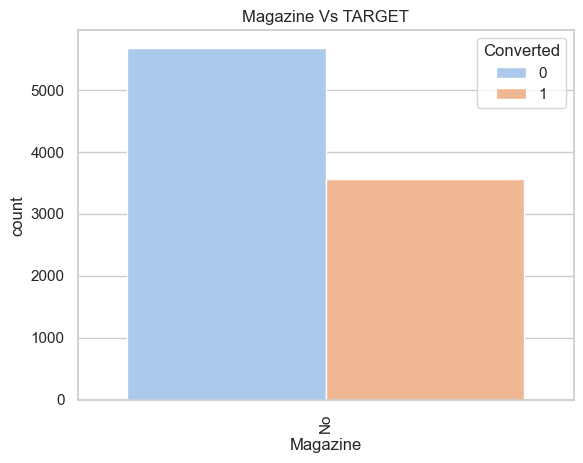

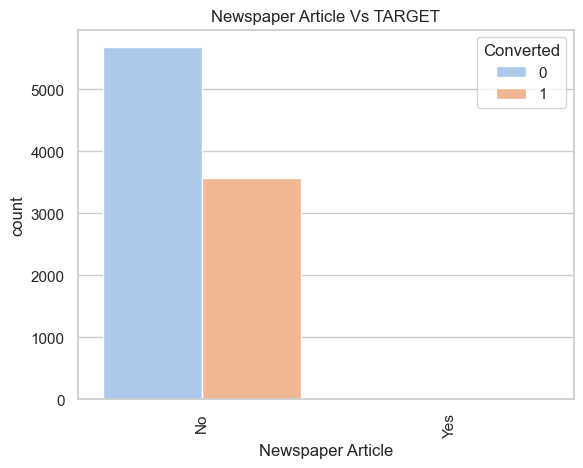

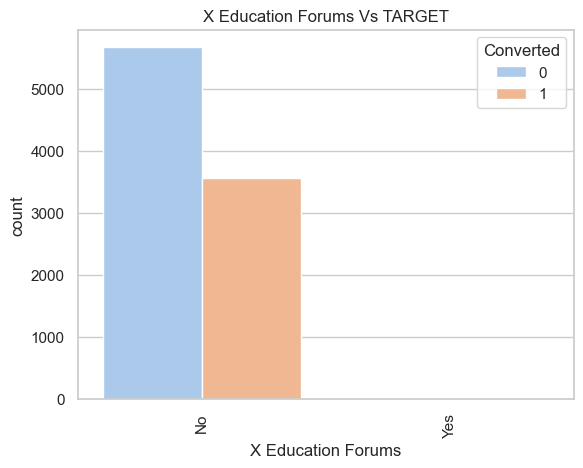

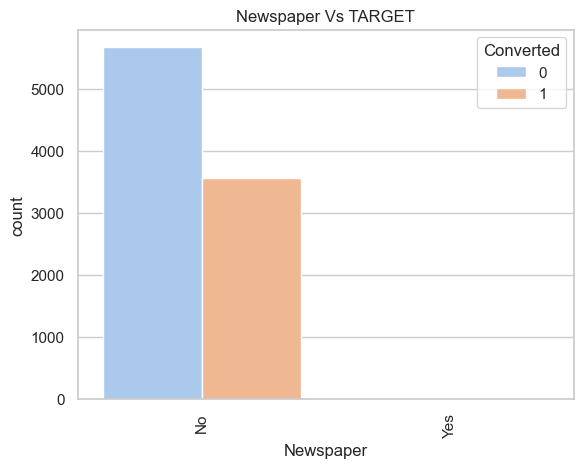

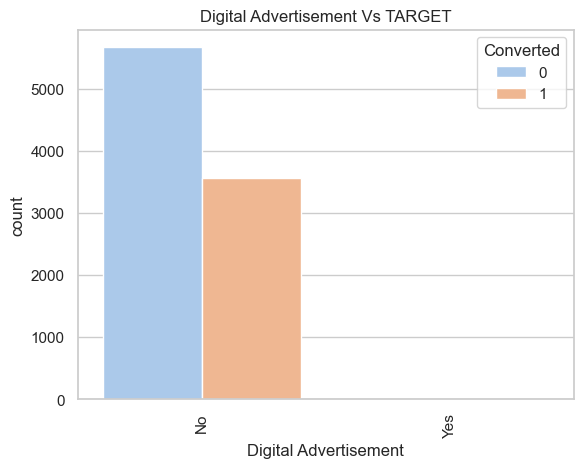

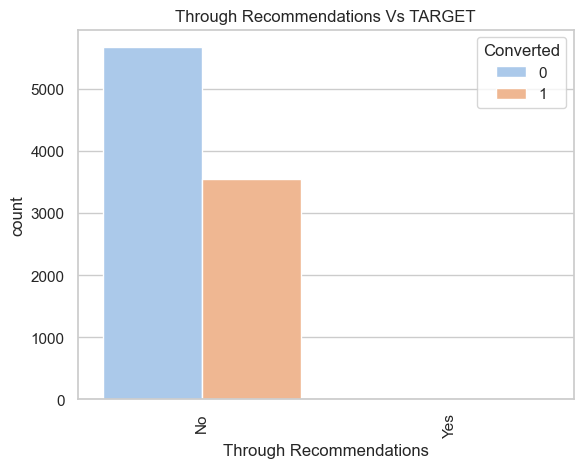

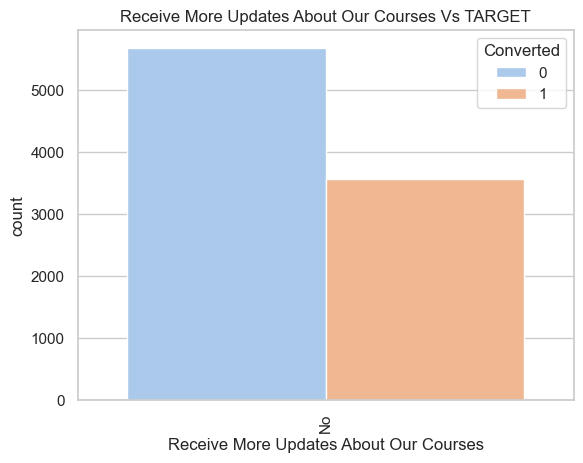

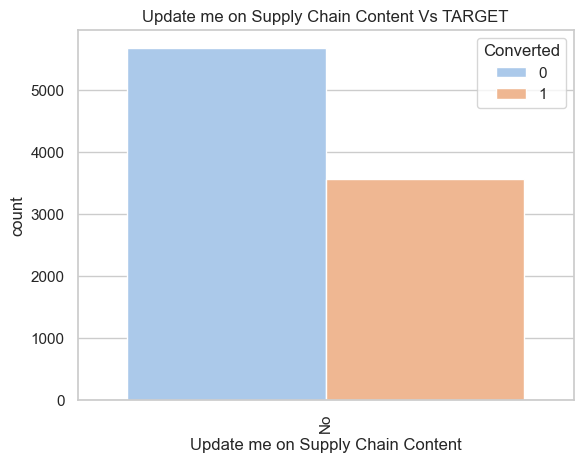

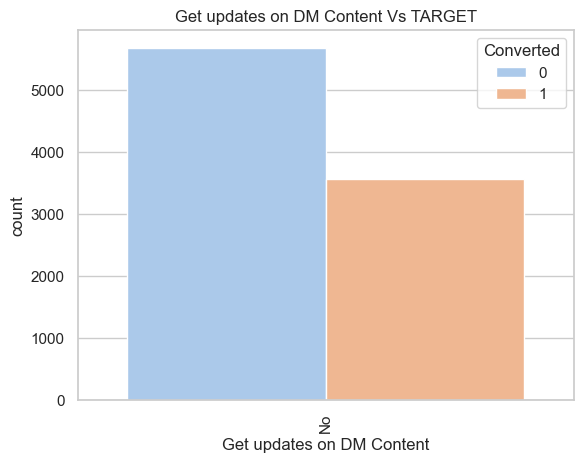

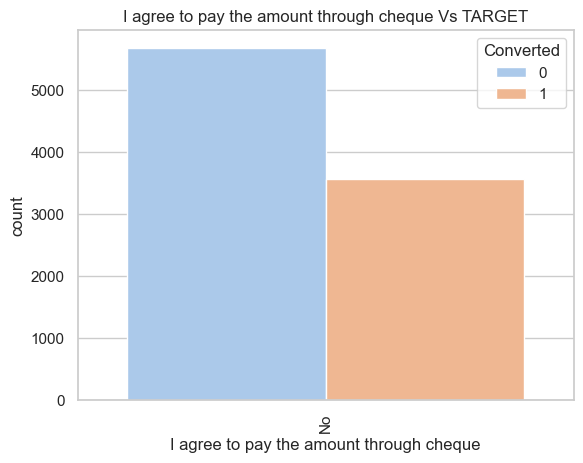

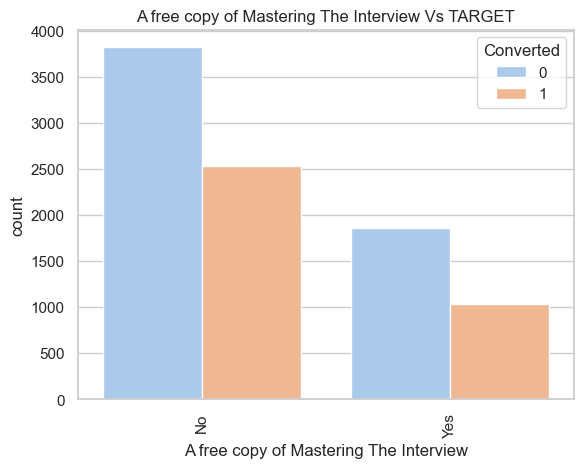

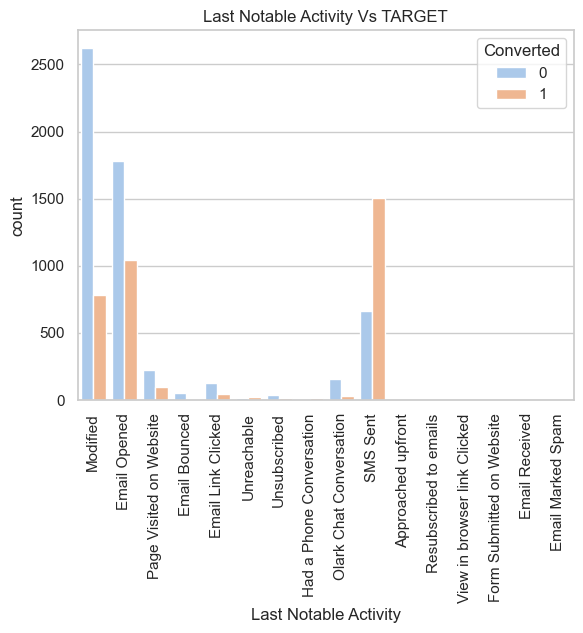

In [143]:
# Step 4.4` we will be using transformation
for feature in CAT_COLS:
    if(0 in df[feature].unique()):
        pass
    else:
        #trying to log normal transformation
        sns.countplot(x=feature, hue=TARGET_COLUMN, data=df)
        plt.title(f"{feature} Vs TARGET")
        plt.xticks(rotation=90)  # Rotate x-labels by 90 degrees
        plt.show()


## Observations
1. Here some categories has higher number of value then others in a single column. 
2. higher number categories supports to not  conversion and less number of categories suuport conversion. 
3. Like in Last Notable Activity if we sent the SMS then chance of convertion is higher. 
4. Also if a source is references then there is higher chance of conversion of that person. 
5. Olark chat conversion has higher negetive impact on the conversion. So, we need the inchance the bot response.

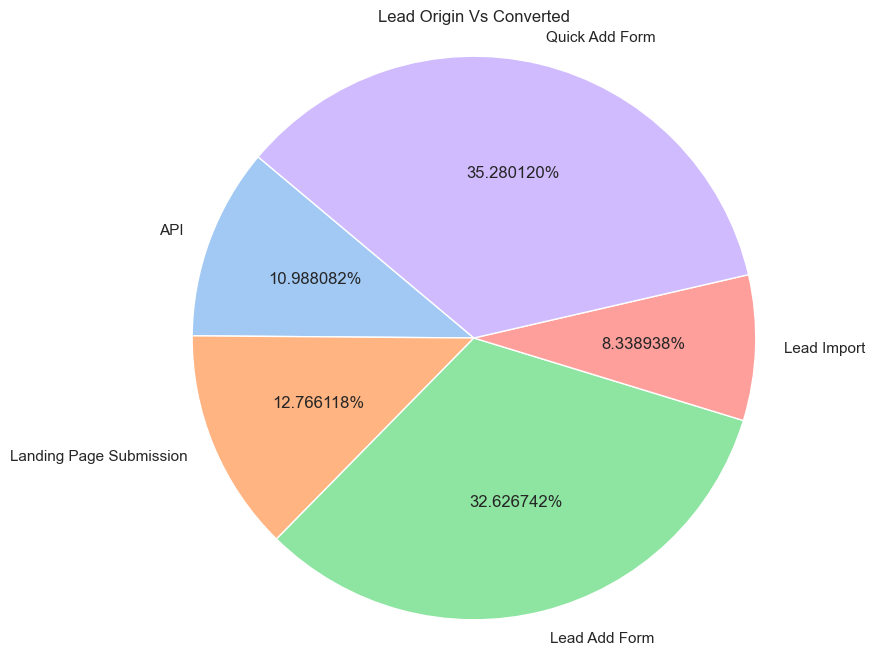

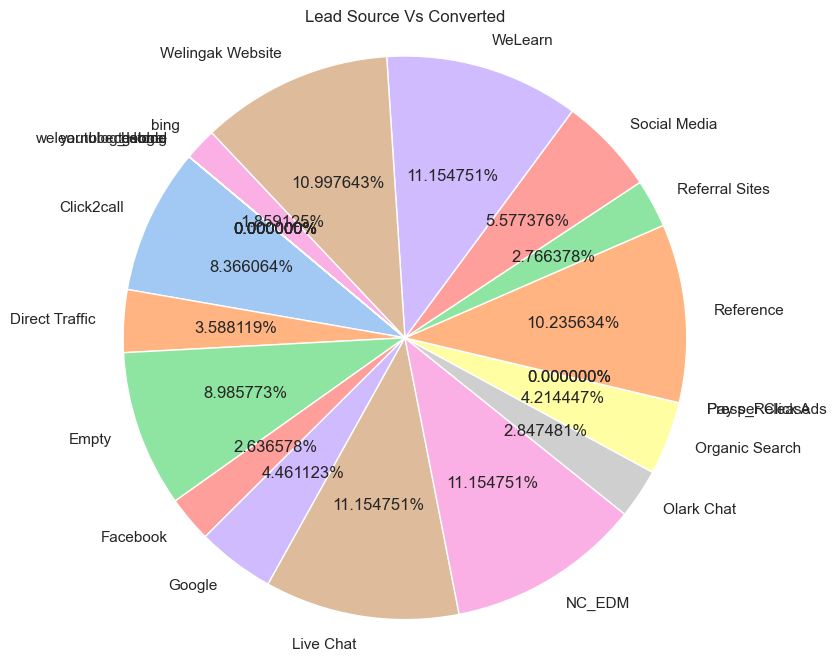

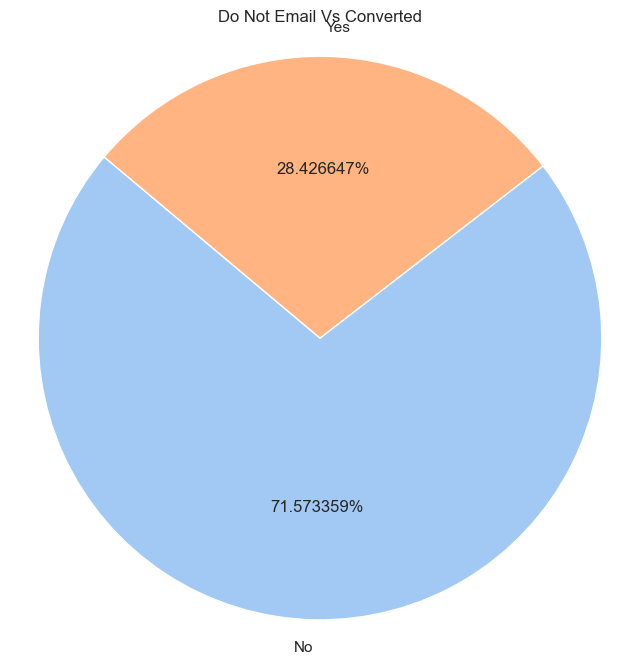

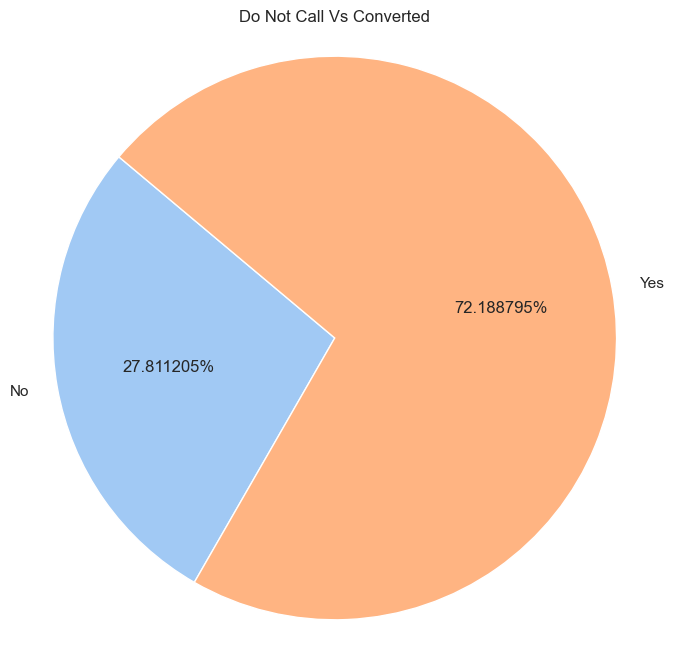

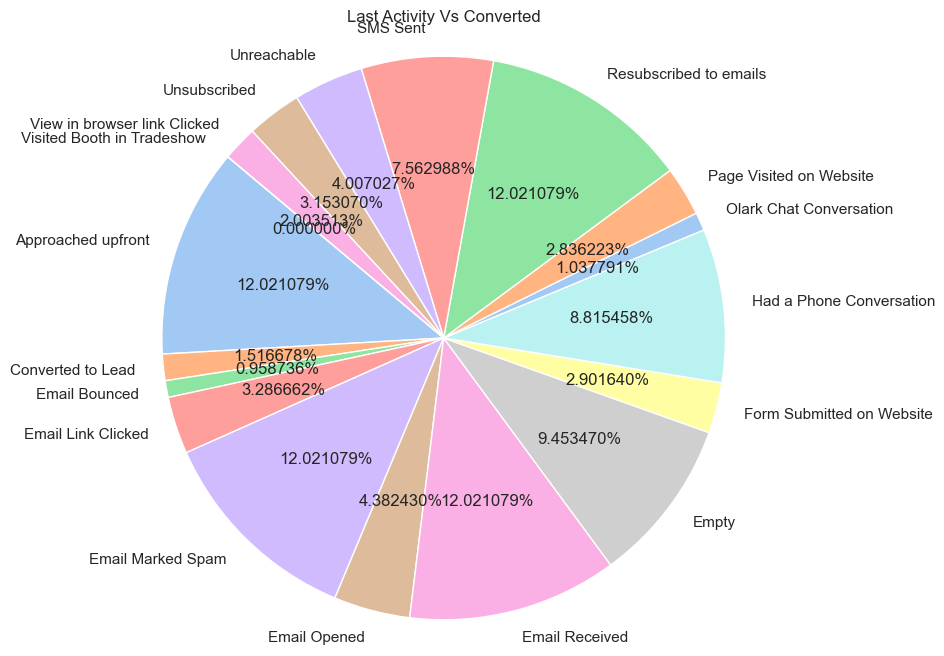

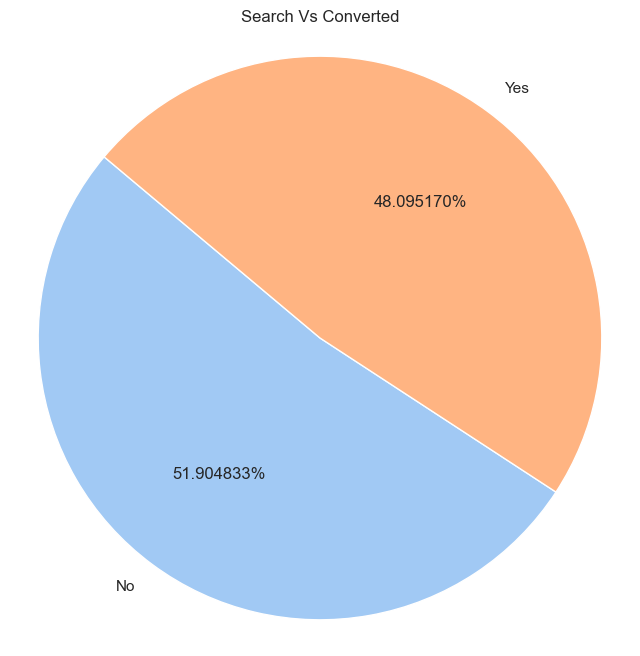

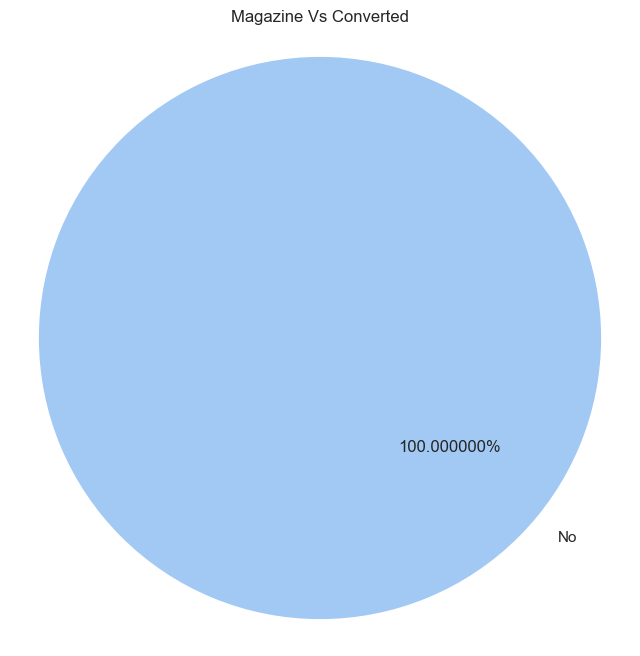

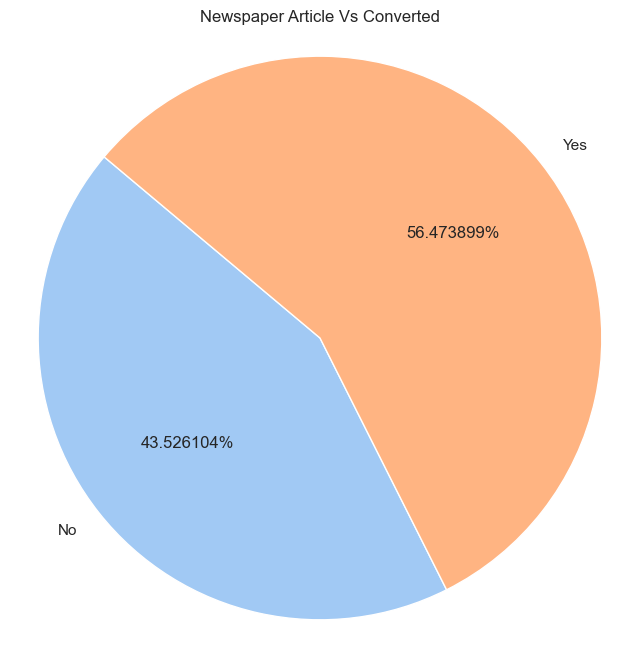

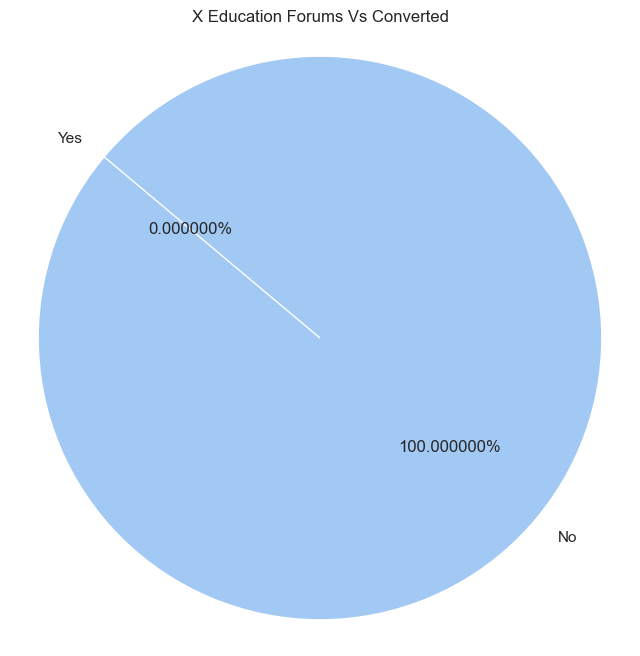

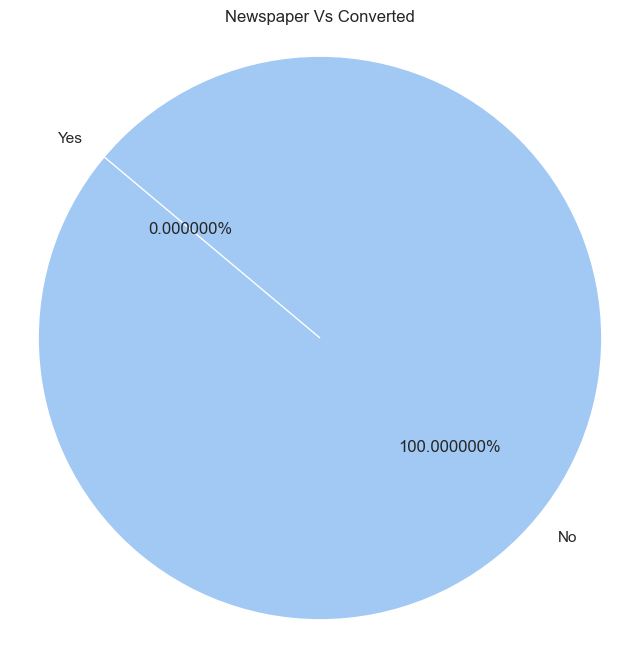

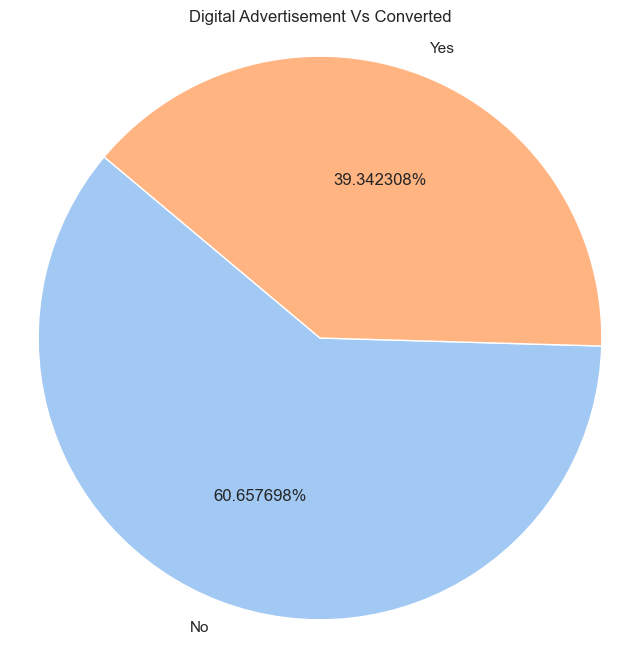

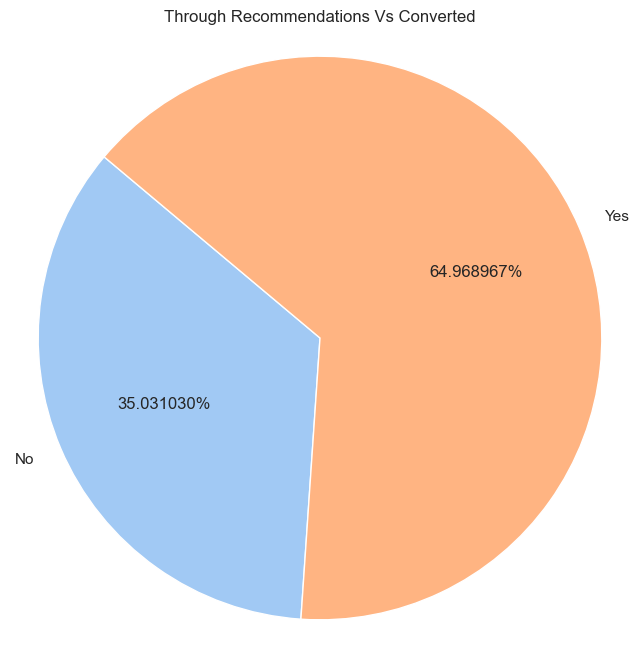

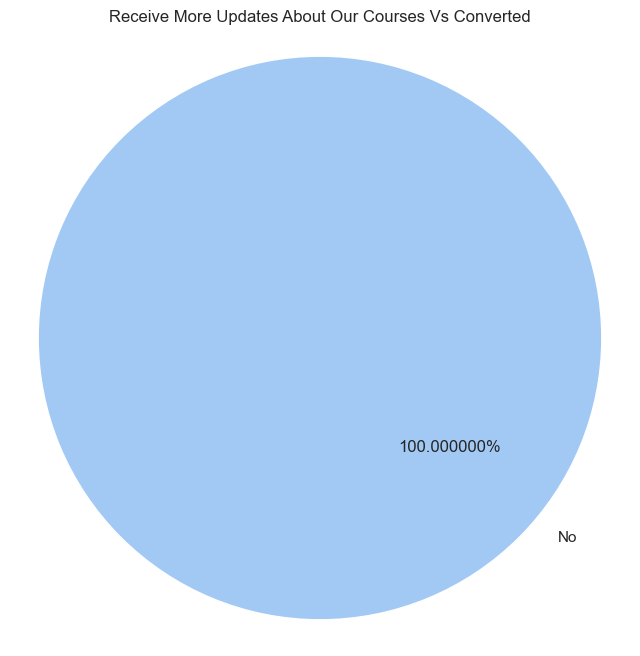

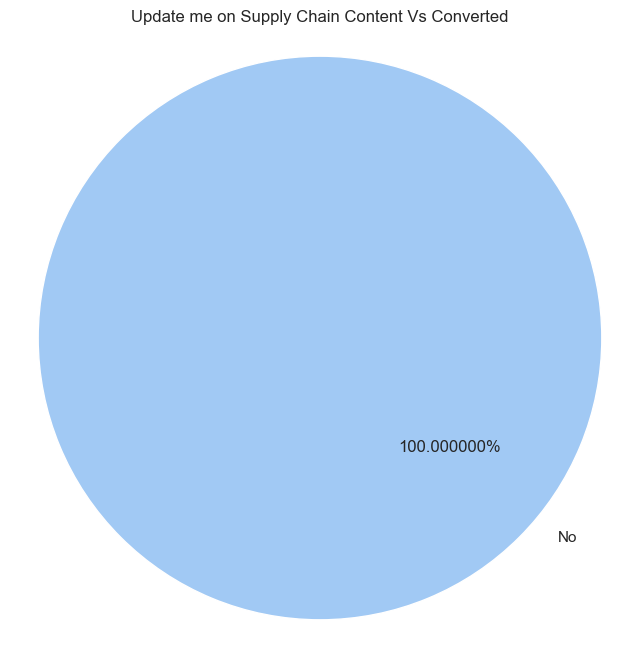

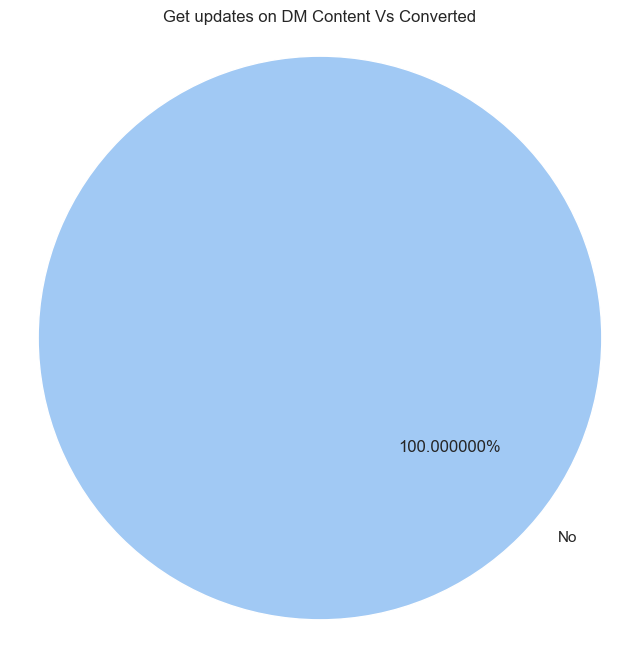

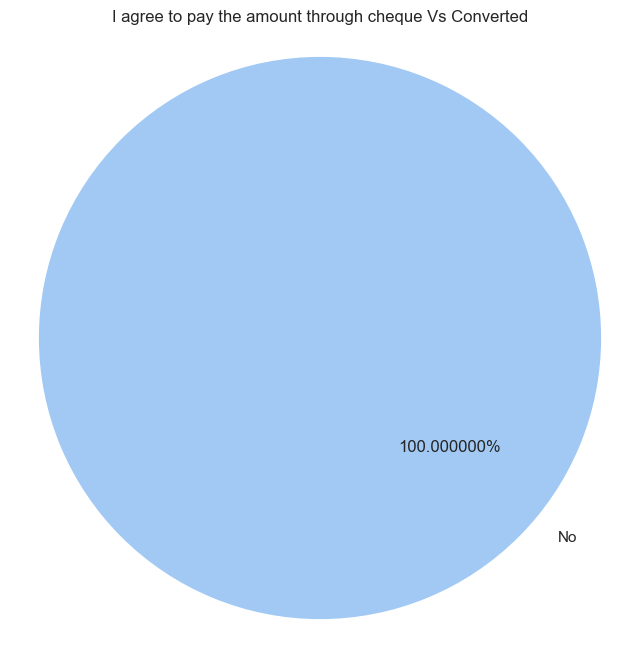

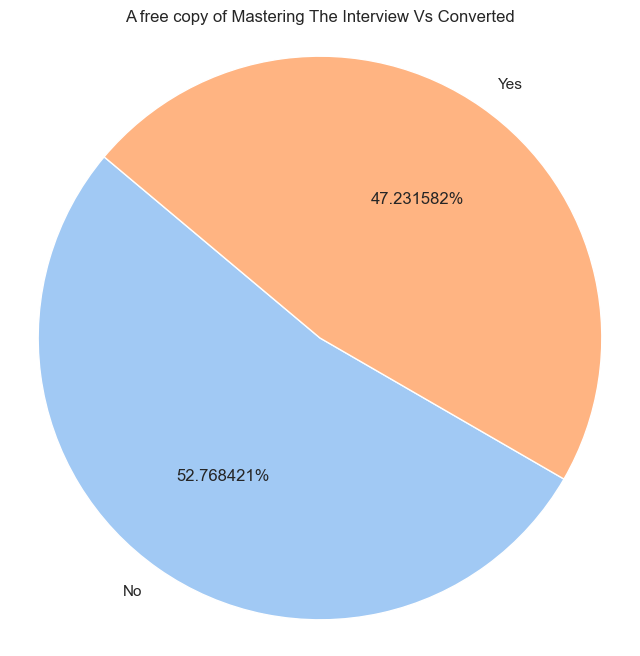

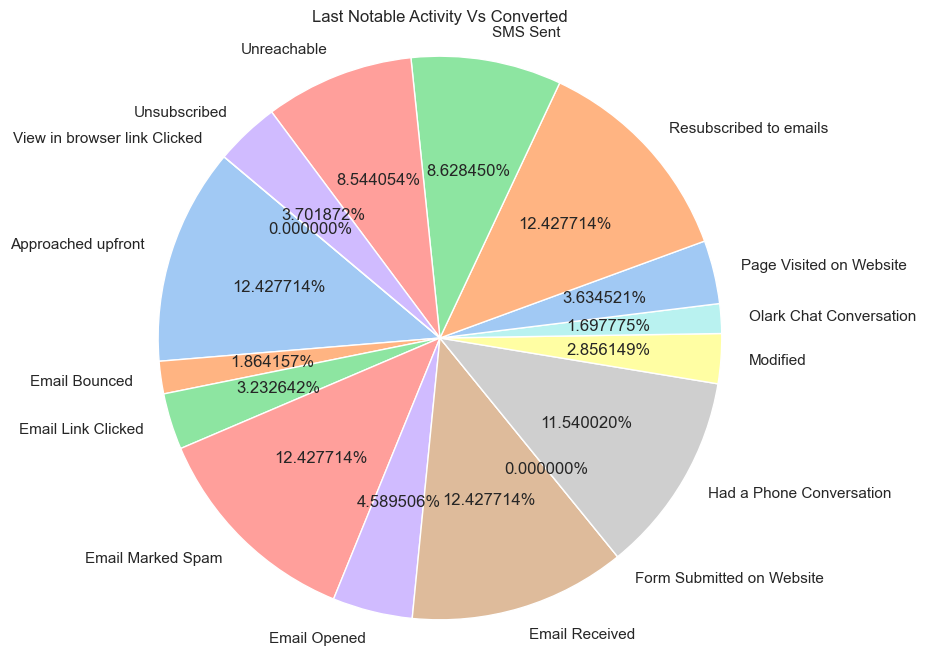

In [144]:
for feature in CAT_COLS:
    gp_df = df.groupby(feature).mean(TARGET_COLUMN)
    #trying to log normal transformation
    sns.set(style="whitegrid")  # Optional: Set the style
    plt.figure(figsize=(8, 8))
    sns.set_palette("pastel")  # Optional: Set the color palette

    # Plot the pie chart
    plt.pie(gp_df[TARGET_COLUMN].values, labels=gp_df[TARGET_COLUMN].index, autopct='%1f%%', startangle=140)

    # Set the aspect ratio to be equal for a circular pie chart
    plt.axis('equal')

    # Show the plot
    plt.title(f'{feature} Vs {TARGET_COLUMN}')
    plt.show()

## Observation
1. As we can see that some the categorical columns contribute 100% to not conversion. 
2. Also some of the cat cols like Do not email. Do not call has higher number of negetive corelation to conversion. 
3. Also references or new paper articles are the effective sources till now.

In [145]:
## Step 4.5 Bivariate on Numerical columns

DESCERETE_NUM_COL = [col for col in NUM_COLS if len(df[col].unique()) < 25]
CONTINUOUS_NUM_COL = [col for col in NUM_COLS if col not in DESCERETE_NUM_COL]
print(f"Descerete Numerical Cols :{len(DESCERETE_NUM_COL)} : Continuous Numerical Cols : {len(CONTINUOUS_NUM_COL)}")


Descerete Numerical Cols :1 : Continuous Numerical Cols : 4


## Observations
1. Here number of column is No descerete columns are 1 and continuous cols are 15 

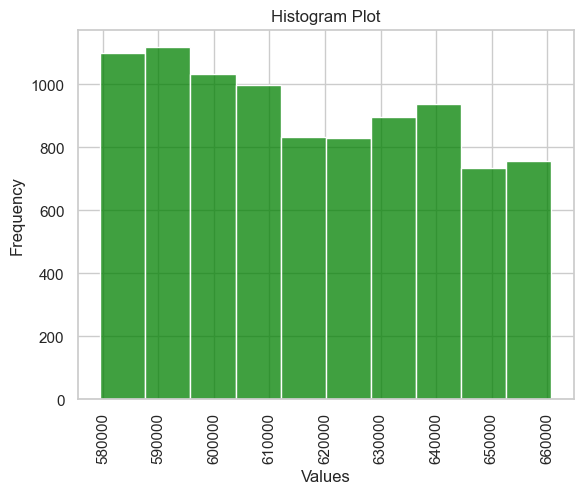

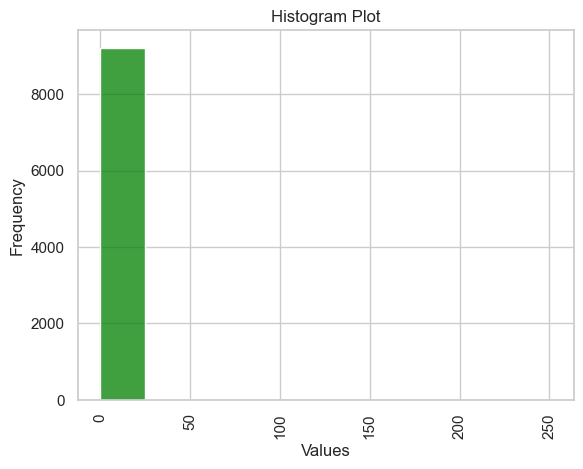

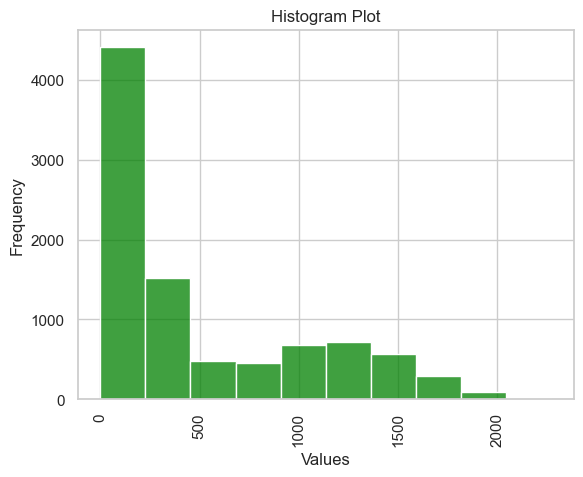

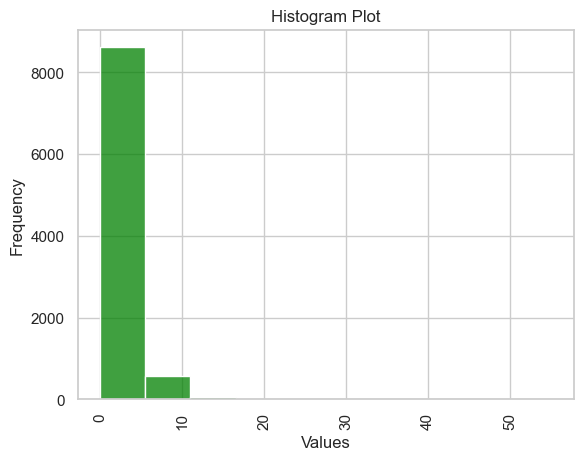

In [146]:
## Step :4.6  Univariate analysis of continuous numerical columns.
# Create a histogram plot for a specific column
for feature in CONTINUOUS_NUM_COL:
    sns.histplot(data=df, x=feature, bins=10, kde=False, color='green')
    # Set plot labels and title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram Plot')
    plt.xticks(rotation=90)  # Rotate x-labels by 90 degrees
    # Show the plot
    plt.show()

## Observations:
1. Distributionof these continuous numerical columns are not normalized these are left skewed. Also Some of then have outliers because of these we can see the barr at one side and one single value on other side.

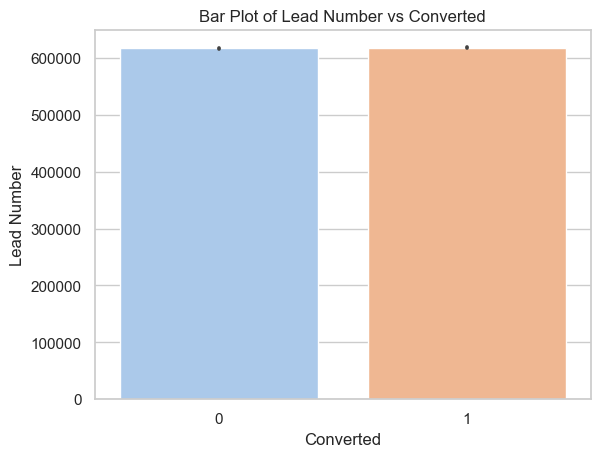

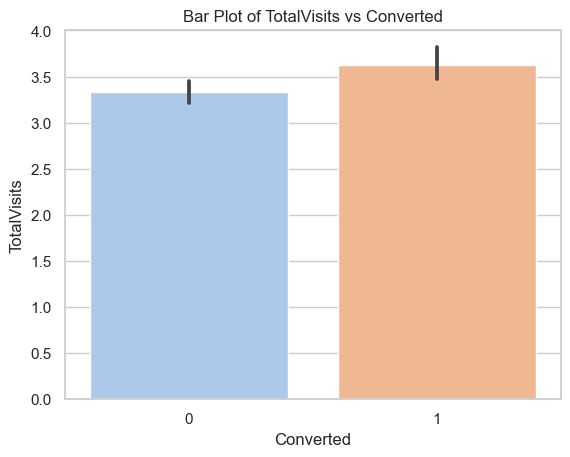

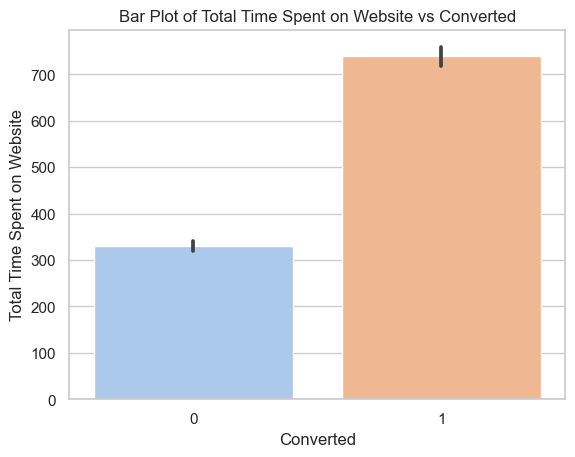

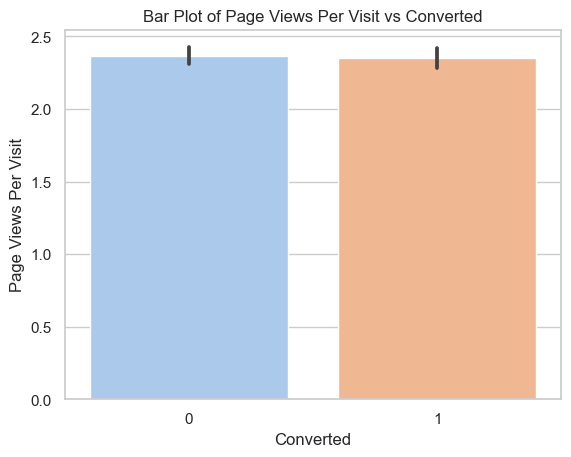

In [147]:
## Bivariate analysis of descerete variable.
for feature in CONTINUOUS_NUM_COL:
    # Create a bar plot
    sns.barplot(x=TARGET_COLUMN, y=feature, data=df)

    # Set plot labels and title
    plt.xlabel(f'{TARGET_COLUMN}')
    plt.ylabel(f'{feature}')
    plt.title(f'Bar Plot of {feature} vs {TARGET_COLUMN}')
    # Show the plot
    plt.show()

## Observations
1. Here we can see that time spent and TotalVisit on website has higher potitive impact on conversion
2. And page views has netural impact on the conversion.

## Step 5: Outlier detection 

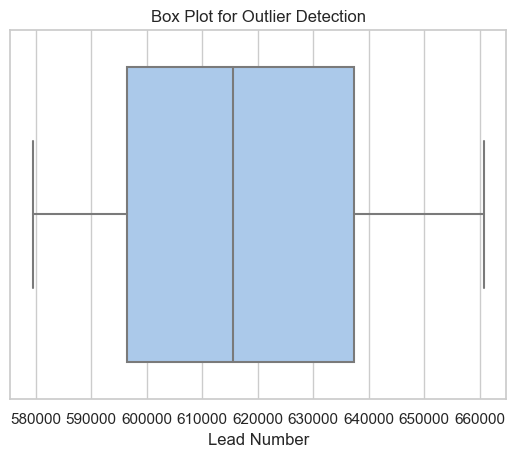

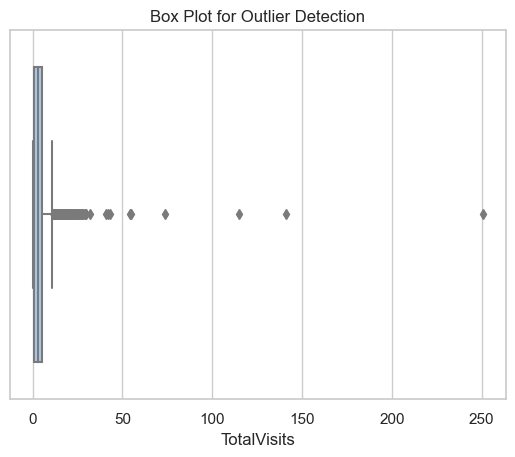

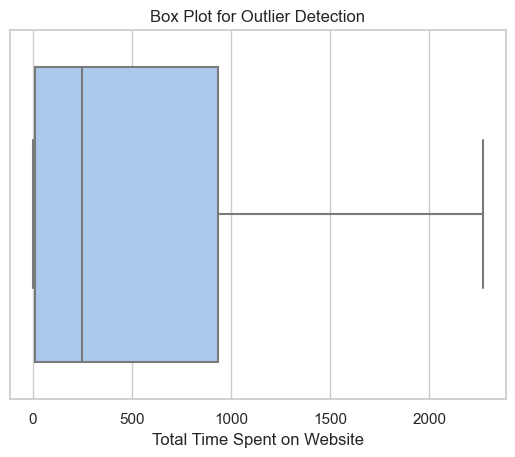

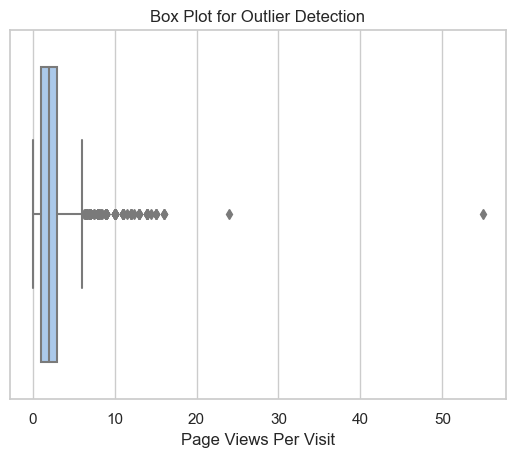

In [148]:
## Step 5.1: Checking is their any outliers or not.
## Step 5.1.1: Box plot for outlier detection.
for feature in CONTINUOUS_NUM_COL:
    # Create a box plot
    sns.boxplot(x=df[feature])

    # Set plot labels and title
    plt.xlabel(f'{feature}')
    plt.title('Box Plot for Outlier Detection')

    # Show the plot
    plt.show()

## Observations
1. In total visits and page views per visit has outliers. 
2. Removing outliers does not solve the problem we need to cap the outlier that means if some day total visit per page goes higher then a threshold then we will cap this with thresh value for better results from the model.

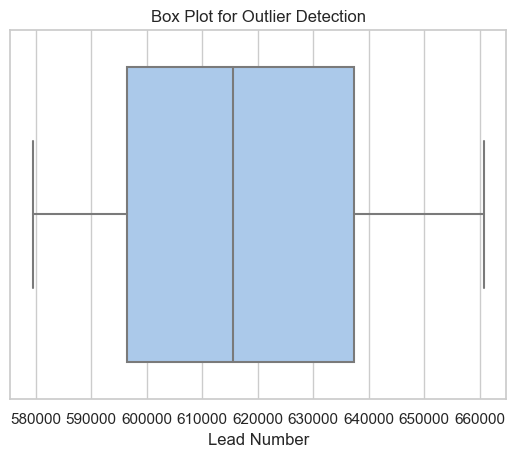

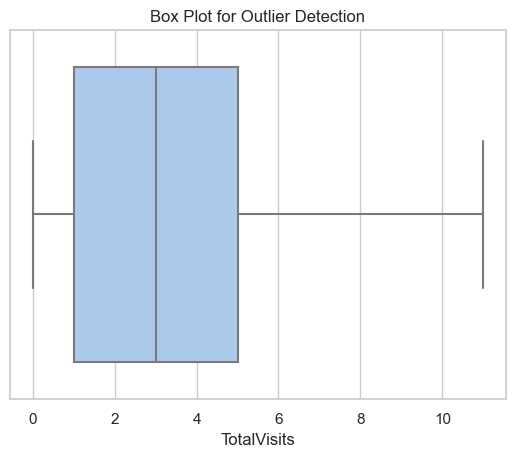

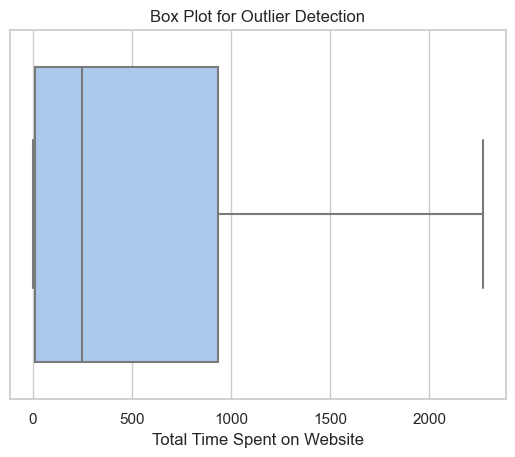

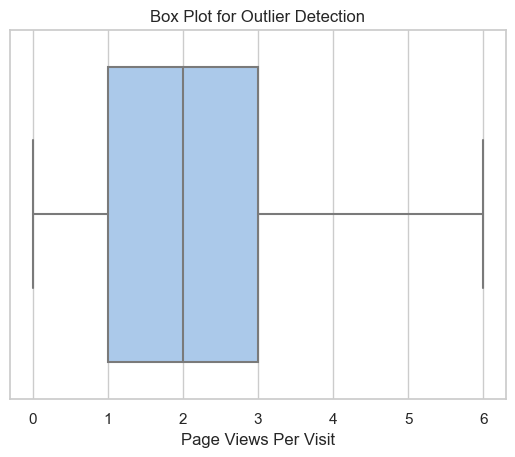

In [149]:
## Step 5.2.1: using z-index method where  we use iqr to detect the outler then we cap the outlier value.
def handle_outlier(df,features):
    for feature in features:
        percentile25 = df[feature].quantile(0.25)
        percentile75 = df[feature].quantile(0.75)
        iqr  = percentile75 - percentile25
        upper_limit = percentile75 + (1.5)*iqr
        lower_limit = percentile25 - (1.5)*iqr
        if(upper_limit >0):
            # df = df[df[feature]< upper_limit]
            # df = df[df[feature]>lower_limit]
            df[feature] = df[feature].apply(lambda x : x if x < upper_limit else upper_limit)
            df[feature] = df[feature].apply(lambda x : x if x> lower_limit else lower_limit)
    return df

df = handle_outlier(df,CONTINUOUS_NUM_COL)

## Step 5.2.2 checking the after effect of outlier capping.
for feature in CONTINUOUS_NUM_COL:
    # Create a box plot
    sns.boxplot(x=df[feature])

    # Set plot labels and title
    plt.xlabel(f'{feature}')
    plt.title('Box Plot for Outlier Detection')

    # Show the plot
    plt.show()

## Observations
1. Now there is not outliers, we cap the outliers using z-index method. where we cap the outlier between IQR range. 


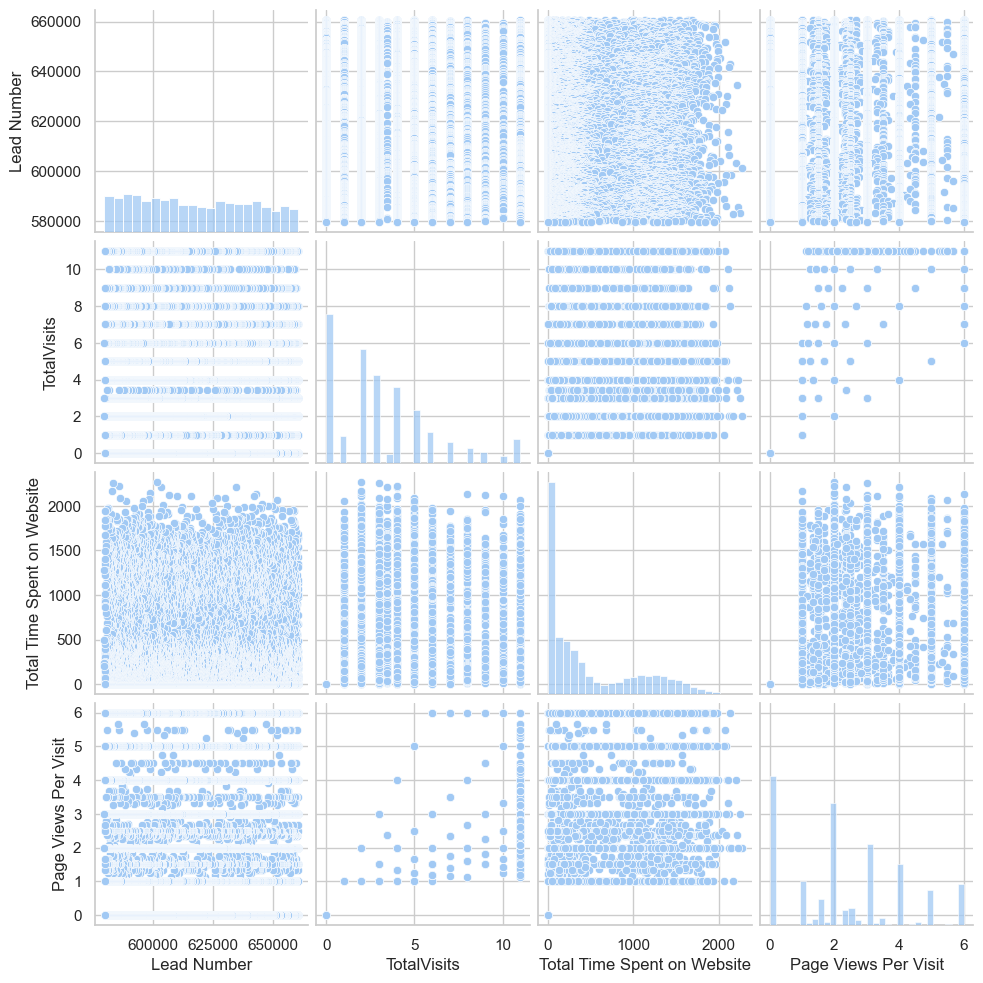

In [150]:
## Step 4.7 Multivariate Analysis
sns.pairplot(df[CONTINUOUS_NUM_COL])

# Show the plot
plt.show()

In [151]:
df[CAT_COLS].shape

(9240, 18)

## Ovservations:
1. In the pair plot we can see the scatter plots between multiple independent numerical variables that follows some trend or has some correlation between them.


## Step 6: Features Selections or Features Engineering.

In [152]:
## Step 6.1: converting categorical columns into numerical value
for feature in CAT_COLS:
    labels_ordered=df.groupby([feature])[TARGET_COLUMN].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [153]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,1,10,1,0,0,0.0,0,0.0,5,...,1,1,1,0,0,0,0,0,1,4
1,660728,1,12,1,0,0,5.0,674,2.5,10,...,1,1,1,0,0,0,0,0,1,8
2,660727,2,11,1,0,1,2.0,1532,2.0,10,...,1,1,1,0,0,0,0,0,0,8
3,660719,2,11,1,0,0,1.0,305,1.0,9,...,1,1,1,0,0,0,0,0,1,4
4,660681,2,13,1,0,1,2.0,1428,1.0,3,...,1,1,1,0,0,0,0,0,1,4


## Observations
1. Here we did label encoding with of categorical columns. 


In [154]:
# S tep 6.2: performing data scaling
feature_scaler = [feature for feature in df.columns if feature not in [TARGET_COLUMN]]
scaler = MinMaxScaler()
scaler.fit(df[feature_scaler])

# transform the train and test set, and add on the Id and SalePrice variables
df = pd.concat([df[[TARGET_COLUMN]].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scaler]), columns=feature_scaler)],
                    axis=1)

## Observations
1. Scaling the features values to increase the model accuracy in prediction andfor data balanceing.

In [155]:
## Step 6.3: Correlation with TARGET COLUMN
corr_saleprice = df.corr()[TARGET_COLUMN]

corr_saleprice

Converted                                   1.000000
Lead Number                                 0.025157
Lead Origin                                 0.239641
Lead Source                                 0.321162
Do Not Email                                0.135580
Do Not Call                                 0.018581
TotalVisits                                 0.047872
Total Time Spent on Website                 0.362483
Page Views Per Visit                       -0.003149
Last Activity                               0.356229
Search                                      0.002261
Magazine                                         NaN
Newspaper Article                           0.003465
X Education Forums                          0.008238
Newspaper                                   0.008238
Digital Advertisement                       0.005789
Through Recommendations                     0.018607
Receive More Updates About Our Courses           NaN
Update me on Supply Chain Content             

## Observations
1. Here we can see the all the features show positive correlation but some show high or some very low.
2. In the next step we will filter these features based on correaltion value by applying a filter with a threshold value.


In [156]:

## Step 6.4: Selecting columns with threshold values.
selected_cols = corr_saleprice[(corr_saleprice >0.01) | (corr_saleprice < -0.01)].index.tolist()
selected_cols

['Converted',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'TotalVisits',
 'Total Time Spent on Website',
 'Last Activity',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

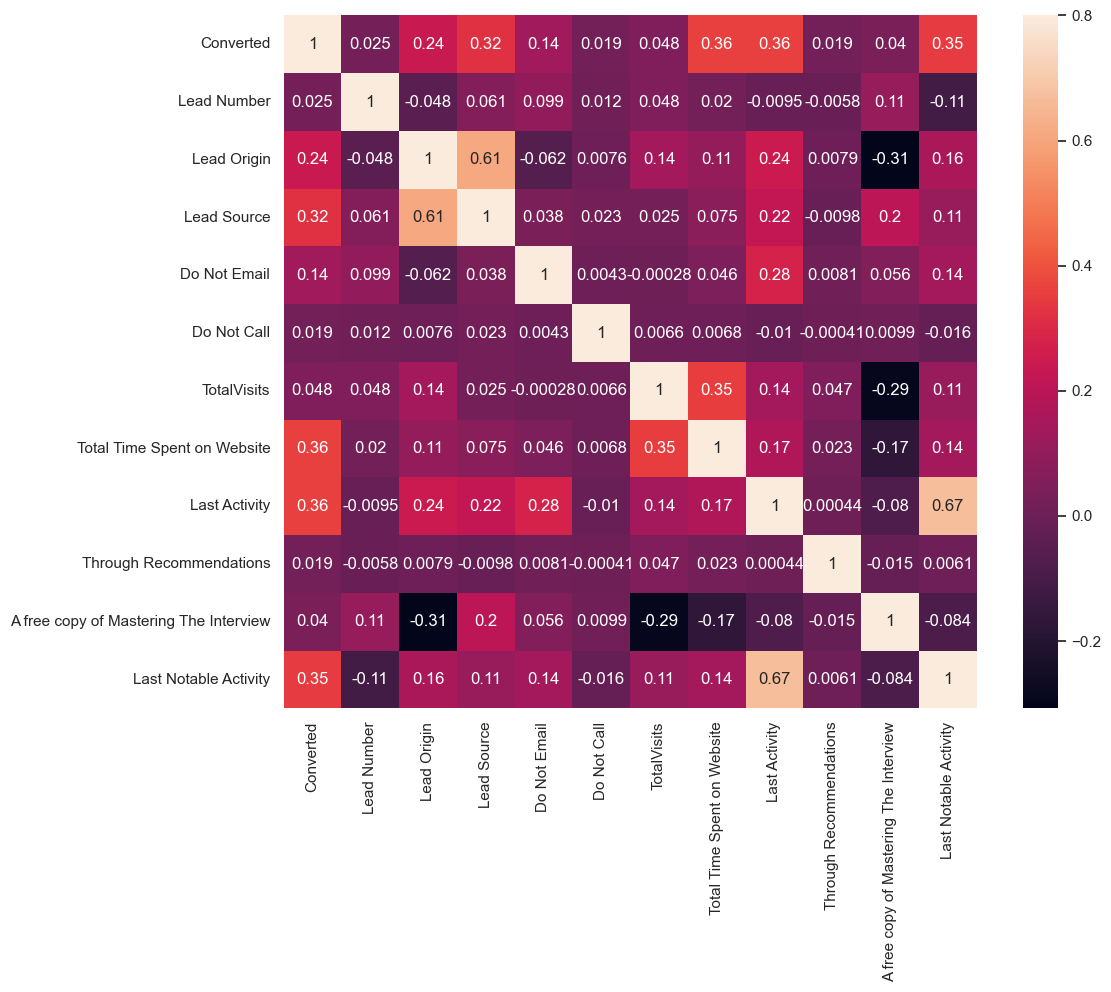

In [157]:
##correlation matrix
selected_col_df = df[selected_cols]
corrmat = selected_col_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

## Observations
1. Heat maps showcase the same that we have eariler discussed.

## Step 7 Modeling

In [158]:
Y =df[TARGET_COLUMN]
X_train = df[selected_cols].drop([TARGET_COLUMN],axis = 1)

In [159]:
# apply SelectKBest class to extract top most features

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_train, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(30, 'Score'))
selected_features = featureScores.Specs.to_list()


                                     Specs       Score
6              Total Time Spent on Website  329.030010
7                            Last Activity   97.564904
10                   Last Notable Activity   72.086465
1                              Lead Origin   30.511845
2                              Lead Source   14.371641
3                             Do Not Email   13.492408
5                              TotalVisits    4.885078
9   A free copy of Mastering The Interview    4.579311
8                  Through Recommendations    3.196801
4                              Do Not Call    3.189553
0                              Lead Number    1.047568


In [160]:
X = df[selected_features]

In [161]:
# Spliting training and testing dataset 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6468, 11), (2772, 11), (6468,), (2772,))

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def classification_evaluation(y_true, y_pred):
    """
    Evaluate the performance of a classification model using various metrics.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.

    Returns:
        accuracy (float): Accuracy of the model.
        precision (float): Precision of the model.
        recall (float): Recall of the model.
        f1 (float): F1 score of the model.
        confusion_matrix (array): Confusion matrix.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, confusion_mat


In [163]:
from sklearn.linear_model import LogisticRegression

# Assuming you have X_train, X_test, y_train, and y_test defined

# Initialize the DataFrame to store model evaluation metrics
models = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"])

# Instantiate the Logistic Regression model
log_reg = LogisticRegression()

# Train the Logistic Regression model
log_reg.fit(X_train, y_train)

# Predictions on the training set
pred_train = log_reg.predict(X_train)

# Evaluate the model on the training set
accuracy_train, precision_train, recall_train, f1_train, confusion_mat_train = classification_evaluation(y_train, pred_train)

# Print evaluation metrics for the training set
print("On Training Dataset.. ")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
print(f"Confusion Matrix:\n{confusion_mat_train}")

# Predictions on the test set
pred_test = log_reg.predict(X_test)

# Evaluate the model on the test set
accuracy_test, precision_test, recall_test, f1_test, confusion_mat_test = classification_evaluation(y_test, pred_test)

# Print evaluation metrics for the test set
print("\nTest Result:\n================================================")
print("On Testing dataset...")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")
print(f"Confusion Matrix:\n{confusion_mat_test}")

# Record the evaluation metrics
new_row = {"Model": "Logistic Regression", "Accuracy": accuracy_test, "Precision": precision_test,
           "Recall": recall_test, "F1 Score": f1_test, "Confusion Matrix": confusion_mat_test}
# models = models.append(new_row, ignore_index=True)
models.loc[len(models)] = new_row

On Training Dataset.. 
Accuracy: 0.7742733457019171
Precision: 0.7415094339622641
Recall: 0.6328502415458938
F1 Score: 0.682884448305821
Confusion Matrix:
[[3436  548]
 [ 912 1572]]

Test Result:
On Testing dataset...
Accuracy: 0.7875180375180375
Precision: 0.7469635627530364
Recall: 0.6852367688022284
F1 Score: 0.7147699757869249
Confusion Matrix:
[[1445  250]
 [ 339  738]]


## Observations
1. Model achived accuracy of 72% and it successfully classify 1445 in positive and 730 in negative side.
2. F-Score is 71 which is good.
3. In the next step we will implemnt hyper parameter tunning for further increasing the accuracy of the model

In [164]:
import matplotlib.pyplot as plt

def plot_evaluation_metrics(models_df):
    """
    Plot the accuracy and F1 score from the models DataFrame.

    Parameters:
        models_df (pandas.DataFrame): DataFrame containing evaluation metrics for different models.
    """
    plt.figure(figsize=(10, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.bar(models_df['Model'], models_df['Accuracy'], color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)

    # Plot F1 score
    plt.subplot(1, 2, 2)
    plt.bar(models_df['Model'], models_df['F1 Score'], color='lightgreen')
    plt.xlabel('Model')
    plt.ylabel('F1 Score')
    plt.title('Model F1 Score')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()


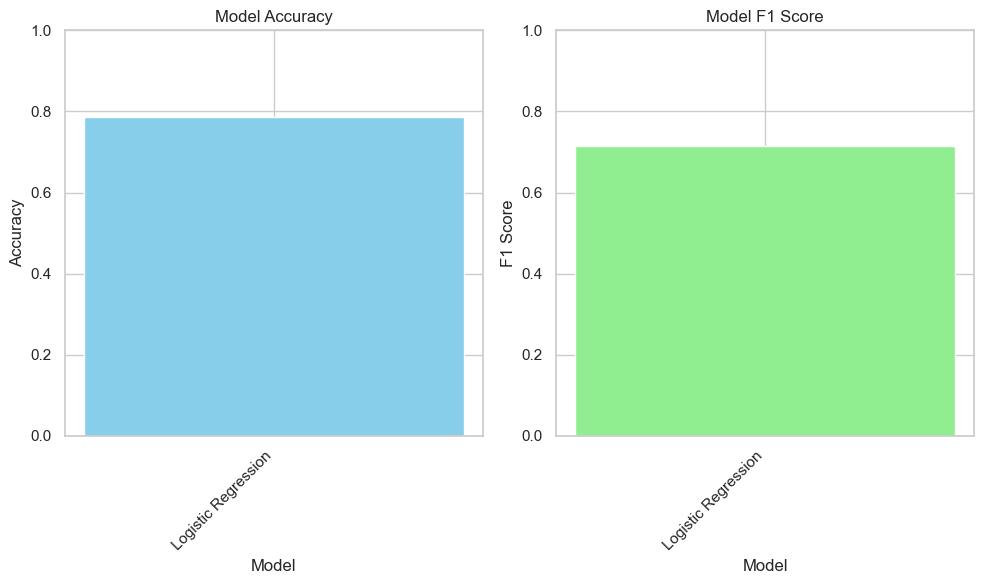

In [165]:
plot_evaluation_metrics(models)